# Profitable App Profile Analysis for the App Store and Google Play
***


In this project we will analyse what makes an mobile app popular and how this could be in used in order to built more profitable apps. Our main goal is to come up with an app sugestion that can be profitable fot both App Store and Google Play markets. The app should be free and make its profit out of advertising and because of that the we need to analyse the data to see what makes an app popular.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

A data set containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from [this link](https://www.kaggle.com/lava18/google-play-store-apps).

A data set containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from [this link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

![](https://www.imagemhost.com.br/images/2020/04/06/image.png)

Image: <a href="https://www.freepik.com/free-photos-vectors/technology">Technology vector created by stories - www.freepik.com</a>

# Exploring the Data

We wil begin by importing the libraries we'll use and reading the datasets into two dataframes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ios = pd.read_csv('datasets/AppleStore.csv', encoding='utf8')
android = pd.read_csv('datasets/googleplaystore.csv', encoding='utf8')

ios.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [2]:
ios.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [3]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the Data

It has been reported in the [Google Play data set dedicated discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) that one of the rows (row 10472) is missing the 'Category' colunm, what makes all the other colunms to shift and because of that this row has less colunms than the it should have. We can see that below.

In [5]:
android.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

We can see that the `Category` column in this row contains a numeric value qhen it should contain a string. That's because it has the data from the `Rating` column, while the `Rating` column has the data from the `Reviews` column and so on untill the last column `Android Ver` ends up with null data. After the drop, we'll print the unique values in the `Category`column so we can see the that the row was deleted.

In [6]:
# Dropping the row
android.drop(index=10472, axis=0, inplace=True)

# Checking the result
print(android['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


The numeric value is no longer in the column. The row was successfully deleted.

## Duplicates


We'll now check both databases in order to find if they present duplicate data. This task willbe divided in two steps. First, we are going to check if there is duplicate data and then we'll delete it.


In [7]:
ios_dups = ios[ios.iloc[:,0].duplicated()]
ios_dups.shape

(0, 17)

In [8]:
android_dups = android[android.iloc[:,0].duplicated()]
android_dups.shape

(1181, 13)

There are 1181 duplicated apps in the android database and none in the IOS database.

In [9]:
android_dups.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


Using the Google Ads app example below, we can see that the only difference between the duplicated data is in the fourth colunm, which correspond to the number of reviews. In order to not delete the eduplicate data randomly, we'll use this criteria to do it. For each duplicate app, we'll only keep only the row with the highest number of reviews because the higher the number, the most recent and reliable the ratings.

In [10]:
android[android['App'] == 'Google Ads']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
238,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
4979,Google Ads,BUSINESS,4.3,29331,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up


To drop the duplicate rows we'll:

* Loop through the unique duplicate apps;
* Get the maximum number of reviews for that app;
* Select the rows that do not attend that requisite;
* Drop those rows;

At this point, most of the duplicates apps are gone. But we'll still have some duplicates left. That's beacause we used the maximum number of reviews to drop the rows and some apps have more than onde row with the maximum number of reviews. As the number o reviews are now the same we can drop anyone. So, we will:

* Use the `DataFrame.drop_duplicates()` method drop the remaining duplicate apps;
* Reset the index. 
* Check the result.

In [11]:
# Looping through the unique apps names
for app in android_dups['App'].unique():
    # Selecting the maximum number of reviews
    max_review = str(android[android['App'] == app]['Reviews'].max())
    # Selecting the rows that do not contain the maximum number of reviews
    rows_to_drop = android[(android['App'] == app) & (android['Reviews'] != max_review)]
    
    # Dropping the rows
    for row in rows_to_drop.index:
        index_to_drop = row
        android.drop(index=index_to_drop, axis=0, inplace=True)

# Dropping the remaining duplicate
android.drop_duplicates(subset='App', keep='first', inplace=True)

# Resetting the index
android.reset_index(drop=True, inplace=True)

# Checking the result
android_dups = android[android.iloc[:,0].duplicated()]
print(android_dups.shape)

(0, 13)


No duplicate rows left, as expected.

## Removing Non-Enlgish apps

If you explore the data set long enoguh, you'll notice that the names of some apps suggest they are not directed to the english-speaking audience, as we can see in the examples below:

In [12]:
print(ios.iloc[814,2])

print(android.iloc[3749,0])

搜狐新闻—新闻热点资讯掌上阅读软件
CPU-Z


As we're not interested in these apps, we will now write a function identify them. We'll take advantage of the [ASCII standard](https://pt.wikipedia.org/wiki/ASCII) and the built-in `ord()` to do it. First, let's test the function.

In [13]:
def is_en(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True

print(is_en('Facebook'))
print(is_en('中国語 AQリスニング'))

True
False


The function seems to be working just fine, but it still has some problems as it cannot identify some english app names as we can see in the example below:

In [14]:
print(is_en('Docs To Go™ Free Office Suite'))
print(is_en('Instachat 😜'))

False
False


That happened because emoji and characters  like `™` are outside the ASCII range we determined. We'll then adapt `is_en()` to identify an app  as non english only if the string has more than three characters that fall outside the ASCII range (0 - 127). That is necessary so we can minimiza the amount of data loss.

In [15]:
def is_en(string):
    count = 0
    for characther in string:
        if ord(characther) > 127:
            count += 1
    if count > 3:
        return False
    return True

print(is_en('Facebook'))
print(is_en('Docs To Go™ Free Office Suite'))
print(is_en('Instachat 😜'))
print(is_en('中国語 AQリスニング'))

True
True
True
False


Altough the function is not perfect, it is now good enough to minimize data loss during the cleaning process.

We'll modify the function once more. If the name of the contains more thna three characthers outside the ASCII range (0 - 127), a null value will be assignd to it. The we'll use the `Series.apply()` method to test every app at once in each dataframe. Finally we'll exclude the null values from the dataframs. AFter we're done we will see how many apps we have left.

In [16]:
def is_en(string):
    count = 0
    for characther in string:
        if ord(characther) > 127:
            count += 1
    if count > 3:
        string = np.nan
    return string

# Applying the function 
ios['track_name'] = ios['track_name'].apply(is_en)
android['App'] = android['App'].apply(is_en)

# Excluding the null values
ios = ios[ios['track_name'].notnull()]
android = android[android['App'].notnull()]

# Checking the number of apps left
print(ios.shape)
print(android.shape)

(6183, 17)
(9614, 13)


We're now left with 9614 Android apps and 6183 iOS apps.

## Filtering free apps

For this project, we are only interested in analyzing the free apps. Therefore, we'll now select only the free apps from each dataframe.

The android data already has a column that specifies if the app is free or not. However, the iOS does not have such column, so we'll select the apps which price is zero.

When we're done we'll check how many apps we have left in each dataframe.

In [17]:
# Selecting the free apps
android_free = android.loc[android['Type'] == 'Free'].copy()
ios_free = ios.loc[ios['price'] == 0].copy()

# Checking how many apps are left
print(android_free.shape)
print(ios_free.shape)

(8861, 13)
(3222, 17)


Finally, we're down to 8861 Android apps and 3222 iOS apps.

# Analysing the Data

## Most popular apps by genre

As mentioned in the introduction, the main goal of this project is dertermine what kind of app is more likely to attrac more users. That is important because the revenue of a free app comes basically from advertisement. Therefore, the higher the number of users, the higher the revenue.
Considering that the end goal is to add the app both on Google Play and App Store, it is necessary to find app profiles that are successful in both markets. We'll start by analyzing the apps by genre in the iOS dataset.



In [18]:
ios_gen_per = ios_free['prime_genre'].value_counts() / ios_free.shape[0] * 100

print(round(ios_gen_per, 2))

Games                58.16
Entertainment         7.88
Photo & Video         4.97
Education             3.66
Social Networking     3.29
Shopping              2.61
Utilities             2.51
Sports                2.14
Music                 2.05
Health & Fitness      2.02
Productivity          1.74
Lifestyle             1.58
News                  1.33
Travel                1.24
Finance               1.12
Weather               0.87
Food & Drink          0.81
Reference             0.56
Business              0.53
Book                  0.43
Navigation            0.19
Medical               0.19
Catalogs              0.12
Name: prime_genre, dtype: float64


In [19]:
ios_gen_per.index[:10]

Index(['Games', 'Entertainment', 'Photo & Video', 'Education',
       'Social Networking', 'Shopping', 'Utilities', 'Sports', 'Music',
       'Health & Fitness'],
      dtype='object')

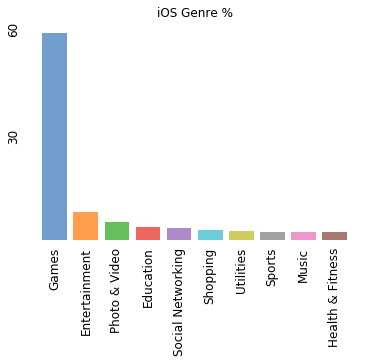

In [20]:
colors = [(114/255, 158/255, 206/255), (255/255, 158/255, 74/255), (103/255, 191/255, 92/255), (237/255, 102/255, 93/255), (173/255, 139/255, 201/255), (109/255, 204/255, 218/255), (205/255, 204/255, 93/255), (162/255, 162/255, 162/255), (237/255, 151/255, 202/255), (168/255, 120/255, 110/255)]


fig, ax = plt.subplots()
ax.bar(x=ios_gen_per.index[:10], height=ios_gen_per[:10], color=colors)
ax.tick_params(bottom=False, top=False, left=False, right=False, labelsize=12, rotation=90)
ax.set_yticks([30, 60])
ax.set_title('iOS Genre %')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

We can easily see the games dominate the English free apps market (58.16%). Entertaiment apps are close to 8% while Photo & Video apps do not reach 5%. Education (3,66%) and Social Networking (3.28%) end the top five. However, it is not yet possible to take any conclusions from this because the fact that there is a large number of apps for a particular genre does not imply that genre has a large number of users. The demand might not be as large as the offer and, also, a large offer creates a more tough market to succeed.

Now, let's take a look in the Google Play data set. For that, we'll analyse two colunms that seem to be related: the 'Category' and 'Genres' colunms.

In [21]:
android_cat_per = android_free['Category'].value_counts() / android_free.shape[0] * 100 
print(round(android_cat_per, 2))

FAMILY                 18.93
GAME                    9.69
TOOLS                   8.45
BUSINESS                4.59
LIFESTYLE               3.90
PRODUCTIVITY            3.89
FINANCE                 3.70
MEDICAL                 3.52
SPORTS                  3.40
PERSONALIZATION         3.32
COMMUNICATION           3.24
HEALTH_AND_FITNESS      3.08
PHOTOGRAPHY             2.95
NEWS_AND_MAGAZINES      2.80
SOCIAL                  2.66
TRAVEL_AND_LOCAL        2.34
SHOPPING                2.25
BOOKS_AND_REFERENCE     2.14
DATING                  1.86
VIDEO_PLAYERS           1.79
MAPS_AND_NAVIGATION     1.40
FOOD_AND_DRINK          1.24
EDUCATION               1.17
ENTERTAINMENT           0.96
LIBRARIES_AND_DEMO      0.94
AUTO_AND_VEHICLES       0.93
HOUSE_AND_HOME          0.82
WEATHER                 0.80
EVENTS                  0.71
PARENTING               0.65
ART_AND_DESIGN          0.64
COMICS                  0.62
BEAUTY                  0.60
Name: Category, dtype: float64


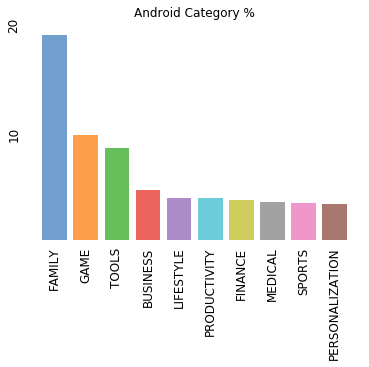

In [22]:
fig, ax = plt.subplots()
ax.bar(x=android_cat_per.index[:10], height=android_cat_per[:10], color=colors)
ax.tick_params(bottom=False, top=False, left=False, right=False, labelsize=12, rotation=90)
ax.set_yticks([10, 20])
ax.set_title('Android Category %')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

In [23]:
android_gen_per = android_free['Genres'].value_counts() / android_free.shape[0] * 100
print(round(android_gen_per, 2))

Tools                                8.44
Entertainment                        6.07
Education                            5.35
Business                             4.59
Lifestyle                            3.89
                                     ... 
Role Playing;Brain Games             0.01
Strategy;Education                   0.01
Travel & Local;Action & Adventure    0.01
Comics;Creativity                    0.01
Music & Audio;Music & Video          0.01
Name: Genres, Length: 115, dtype: float64


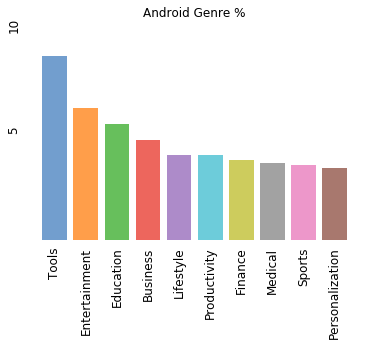

In [24]:
fig, ax = plt.subplots()
ax.bar(x=android_gen_per.index[:10], height=android_gen_per[:10], color=colors)
ax.tick_params(bottom=False, top=False, left=False, right=False, labelsize=12, rotation=90)
ax.set_yticks([5, 10])
ax.set_title('Android Genre %')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

The scenario is completely different for the Google Play dataset as its market is more equally divided among the categories and genres than the iOS market, altough the Family category corresponds to almost 19% of the apps. Games (9.72%), Tools (8.46%), Business (4.59%) and Lifestyle (3.90%) end a diversified top five. The Android database also seems to have more apps designed for practical life purposes than just for gaming.
Considering only the 'Genres' colunm, it has a lot more categories, which makes it harder to analyse and take conclusions from. That's why from now on we'll only consider the 'Category' colunm for the Android apps.

## Most popular apps by genre in the App Store

As the iOS dataset does not contains the number of installs for each app, we'll use the number rating count to mesaure the app's popularity. So, let's see the average rating count for each genre.

In [25]:
ios_gen_rat = ios_free.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False)
print(round(ios_gen_rat, 2))

prime_genre
Navigation           86090.33
Reference            74942.11
Social Networking    71548.35
Music                57326.53
Weather              52279.89
Book                 39758.50
Food & Drink         33333.92
Finance              31467.94
Photo & Video        28441.54
Travel               28243.80
Shopping             26919.69
Health & Fitness     23298.02
Sports               23008.90
Games                22788.67
News                 21248.02
Productivity         21028.41
Utilities            18684.46
Lifestyle            16485.76
Entertainment        14029.83
Business              7491.12
Education             7003.98
Catalogs              4004.00
Medical                612.00
Name: rating_count_tot, dtype: float64


We can see that navigation apps have the highest number of user reviews in average, followed by reference and social networking apps averaging over 70,000 reviews per app. However, we should check how concentrated are these reviews in one or two big apps. For that, we'll display the average rating count per app in each of the top three categories.

In [26]:
for gen in ios_gen_rat.index[:3]:
    df = ios_free[ios_free['prime_genre'] ==  gen]
    print(gen)
    print('\n')
    print(df.groupby('track_name')['rating_count_tot'].mean())
    print('\n')

Navigation


track_name
CoPilot GPS – Car Navigation & Offline Maps           3582
Geocaching®                                          12811
Google Maps - Navigation & Transit                  154911
ImmobilienScout24: Real Estate Search in Germany       187
Railway Route Search                                     5
Waze - GPS Navigation, Maps & Real-time Traffic     345046
Name: rating_count_tot, dtype: int64


Reference


track_name
Bible                                                                                                 985920
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE)                          8535
Dictionary.com Dictionary & Thesaurus                                                                 200047
Dictionary.com Dictionary & Thesaurus for iPad                                                         54175
GUNS MODS for Minecraft PC Edition - Mods Tools                                                         1497
Google Translat

As we can see, the navigation and social networking apps are dominated by few famous apps. Navigation for instance has almost half a million reviews just for Waze and Google Maps. That is why we should consider reference apps as a good option here. This genre reviews are much influenced by the bible app, however this shoud not be a problem since the its number of reviews is so much greater than the others that makes reference apps a one-app genre, which show us a potencial room for new apps to succceed.

We could use the Bible as an example to be replicated with a different famous book, adding new features and making the app even more interactive to the user.

## Most popular apps by genre on Google Play

The Google Play database gives us data about the number of installs for each app. However, we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.) which make it look less precise.


In [27]:
android_inst = android_free['Installs'].value_counts()
android_inst.sort_values(ascending=False)

1,000,000+        1395
100,000+          1024
10,000,000+        932
10,000+            904
1,000+             744
100+               613
5,000,000+         606
500,000+           494
50,000+            423
5,000+             400
10+                314
500+               288
50,000,000+        203
100,000,000+       188
50+                170
5+                  70
1+                  45
500,000,000+        24
1,000,000,000+      20
0+                   4
Name: Installs, dtype: int64

We only intend to get an ideia of which genres attract the most users, therefore we do not need this data to be absolutely precise. We'll then consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

During this process we'll need to convert the number of reviews to float.

We'll then display the average number of intalls for each category.

In [28]:
# MOdifying the Installs column
android_free.loc[:,'Installs'] = android_free.loc[:,'Installs'].str.replace('+','')
android_free.loc[:,'Installs'] = android_free['Installs'].str.replace(',','')
android_free.loc[:,'Installs'] = android_free['Installs'].astype(float)

# Calculating the average per category
android_cat_inst = android_free.groupby('Category')['Installs'].mean()
print(round(android_cat_inst, 2).sort_values(ascending=False))

Category
COMMUNICATION          38456119.17
VIDEO_PLAYERS          24727872.45
SOCIAL                 23253652.13
PHOTOGRAPHY            17805627.64
PRODUCTIVITY           16787331.34
GAME                   15560965.60
TRAVEL_AND_LOCAL       13984077.71
ENTERTAINMENT          11640705.88
TOOLS                  10682301.03
NEWS_AND_MAGAZINES      9549178.47
BOOKS_AND_REFERENCE     8767811.89
SHOPPING                7036877.31
PERSONALIZATION         5201482.61
WEATHER                 5074486.20
HEALTH_AND_FITNESS      4188821.99
MAPS_AND_NAVIGATION     4056941.77
FAMILY                  3696479.24
SPORTS                  3638640.14
ART_AND_DESIGN          1986335.09
FOOD_AND_DRINK          1924897.74
EDUCATION               1820673.08
BUSINESS                1712290.15
LIFESTYLE               1437816.27
FINANCE                 1387692.48
HOUSE_AND_HOME          1331540.56
DATING                   854028.83
COMICS                   817657.27
AUTO_AND_VEHICLES        647317.82
LIBRARIES_A

Communication, Video Players and social apps dominate the Google Play market. We know however that this catgories are already built around some huge apps like Facebook, Whatsapp and YouTube. Considering that and that we suggested the Reference genre as good option for the iOS market, we should take a look at the Book and Reference category.

In [29]:
# Creating a dataframe with only the "Books and References" category
android_books = android_free.loc[android['Category'] == 'BOOKS_AND_REFERENCE'].copy()

# Checking the number of apps in the new dataframe
print(android_books.shape)

# Calculating the number of installs per app
books_install = android_books.groupby('App')['Installs'].sum()
books_install

(190, 13)


App
50000 Free eBooks & Free AudioBooks                 5000000.0
A-J Media Vault                                          50.0
AC Air condition Troubleshoot,Repair,Maintenance       5000.0
AE Bulletins                                           1000.0
AP Stamps and Registration                            10000.0
                                                      ...    
bp e-store                                             1000.0
cloudLibrary                                         100000.0
eBoox new: Reader for fb2 epub zip books              50000.0
eBoox: book reader fb2 epub zip                     1000000.0
wikiHow: how to do anything                         1000000.0
Name: Installs, Length: 190, dtype: float64

We now know that there are 190 apps in this category. Let's chack how many of them have over 100,000,000 installs.

In [30]:
android_books_100 = android_books.loc[android_books['Installs'] >= 100000000]
android_books_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
144,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
2981,Bible,BOOKS_AND_REFERENCE,4.7,2440695,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 2, 2018",Varies with device,Varies with device
3090,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
3654,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
4542,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922,Varies with device,1.000000e+08,Free,0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device


It looks like this category has just a few very popular apps and also a lot of the apps are software for processing and reading ebooks, dictionaries and libraries, which seems to show room for new apps to succeed. 
That's why a similiar ideia to that we suggested for the iOS market may have some potential here. Also, it is part of our goal to suggest the same app to be built for both the plataforms.
Selecting a popular book an making an app out of it, with new features and user's interactions might be the way to go here.

# Conclusions

In this project we expolored, cleaned and analysed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We conclued that creating an app out of a popular book could be profitable for both App Store and Google Play markets. This is big market that is not dominated by some huge very popular apps, also they are full of libraries and e-readers. That looks like a market where there is room for new app to become popular. Therefore, a fun interactive app about a book that lots of people care about could really draw some attention, especially if we use nice features and new forms of interation with the book's content. 
